In [39]:
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

filenames = ['/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi+_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_electron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi-_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_klong_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_pi0_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_muon_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_positron_0_10000.csv',
 '/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/csv_manual_gpz/p5_80_photon_0_10000.csv']

In [40]:
headers = ["Label", "wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
               "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
               "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46", "gpz"]

# Initialize an empty DataFrame to store concatenated data
all_data = pd.DataFrame(columns=headers)

# Loop through each filename
for filename in filenames:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filename, names=headers) # if headers are not present in the file, otherwise remove names=...
    # Concatenate vertically
    all_data = pd.concat([all_data, df[1:]], axis=0, ignore_index=True)

# Optionally: save the concatenated data to a new CSV file
all_data.to_csv('photon_1_data.csv', index=False)

In [41]:
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [42]:
def train_and_save(filename):
    df = pd.read_csv(filename)
    x=df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
               "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
               "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
    y=df['Label'].values
    x_train, x_test, y_train, y_test = train_test_split(    
        x, y, test_size=0.25, random_state=42)
    model = Sequential()
    model.add(Dense(18, input_dim=x.shape[1], activation='relu',
                    kernel_initializer='random_normal'))
    model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
    model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
    model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
    model.compile(loss='binary_crossentropy', 
                  optimizer=tensorflow.keras.optimizers.legacy.Adam(),
                  metrics =['accuracy'])
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=5, verbose=1, mode='auto', restore_best_weights=True)
    model.fit(x_train,y_train,validation_data=(x_test,y_test),
              callbacks=[monitor],verbose=2,epochs=15)
    pred = model(x_test)
    plot_roc(pred,y_test)
    model.save("photon_ID_w_track")



Epoch 1/15
2116/2116 - 2s - loss: 0.3230 - accuracy: 0.8179 - val_loss: 0.3161 - val_accuracy: 0.8212 - 2s/epoch - 839us/step
Epoch 2/15
2116/2116 - 1s - loss: 0.3178 - accuracy: 0.8205 - val_loss: 0.3207 - val_accuracy: 0.8203 - 1s/epoch - 695us/step
Epoch 3/15
2116/2116 - 1s - loss: 0.3189 - accuracy: 0.8200 - val_loss: 0.3168 - val_accuracy: 0.8193 - 1s/epoch - 689us/step
Epoch 4/15
2116/2116 - 1s - loss: 0.3178 - accuracy: 0.8200 - val_loss: 0.3145 - val_accuracy: 0.8211 - 1s/epoch - 688us/step
Epoch 5/15
2116/2116 - 1s - loss: 0.3170 - accuracy: 0.8204 - val_loss: 0.3154 - val_accuracy: 0.8207 - 1s/epoch - 693us/step
Epoch 6/15
2116/2116 - 1s - loss: 0.3173 - accuracy: 0.8203 - val_loss: 0.3179 - val_accuracy: 0.8212 - 1s/epoch - 694us/step
Epoch 7/15
2116/2116 - 2s - loss: 0.3171 - accuracy: 0.8198 - val_loss: 0.3204 - val_accuracy: 0.8207 - 2s/epoch - 753us/step
Epoch 8/15
2116/2116 - 2s - loss: 0.3162 - accuracy: 0.8203 - val_loss: 0.3163 - val_accuracy: 0.8208 - 2s/epoch - 762

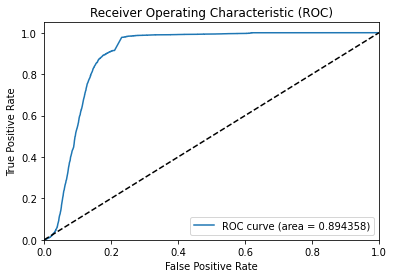

INFO:tensorflow:Assets written to: photon_ID_w_track/assets


INFO:tensorflow:Assets written to: photon_ID_w_track/assets


In [43]:
model = train_and_save("photon_1_data.csv")

In [47]:
def get_column(files, model):
    loaded_model = load_model(model)
    column = []
    for item in files:
        df = pd.read_csv(item)
        train_data = df[["wid_x", "wid_y", "wew_x", "wew_y", "seed_x", "seed_y",
               "trkl_x", "trkl_y", "trkl_z", "trkl_px", "trkl_py", "trkl_pz", "E/p",
               "h4_41", "h4_42", "h4_43", "h4_44", "h4_45", "h4_46"]].values
        predictions = loaded_model.predict(train_data)
        positive_count = np.sum(predictions > 0.5)
        positive_rate = positive_count / len(predictions)
        column.append(positive_rate)
    return column

In [49]:
ph_column = get_column(filenames, "/Users/wongdowling/Documents/Github/DQ_Dowling/new_ID/w_Ep/NNs/photon_ID_w_track")
print(ph_column)

326/326 [==============================] - 0s 334us/step
[0.20676312247644685, 0.14958606908364258, 0.23969763472323824, 0.5653147549141577, 0.9770828359990451, 0.027189124350259896, 0.15345171398727567, 0.9779228258782876]
